# Regressione logistica
La regressione logistica è un modello di classificazione lineare che ci permette di eseguire classificazioni binomiali, ovvero tra due classi.
<br><br>
Un problema di classificazione può essere ridotto nel trovare i coefficenti della retta che meglio separa gli esempi appartenenti a diverse classi.
<img src="res/classification.png" width="500px" />
<br><br>
In questo notebook eseguiremo una regressione logistica sul [Winsconsis breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29), un dataset contenente proprietà estratte da immagini digitali di tumori al seno.<br>Lo scopo della nostra classificazione è riconoscere un tumore maligno.<br>
Importiamo le librerie che ci serviranno.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Diamo uno sguardo alle proprietà del dataset.

In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Il DataFrame contiene 32 colonne, 31 features e una variabile target **diagnosis**, che ci dice se un tumore è maligno o benigno:
* **M** il tuomore è maligno
* **B** il tumore è benigno

## Regressione logistica con due features
Eseguiamo una regressione logistica utilizzando solo due features del dataset:
* **radius_se** l'errore standard del raggio del tumore
* **concave points_worst** il numero peggiore di punti di concavità nel contorno del tumore

Creiamo gli array numpy per addestramento e test.

In [4]:
X = breast_cancer[["radius_se","concave points_worst"]].values
Y = breast_cancer['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

Le classi di appartenenza sono rappresentate da due label (M, B), utilizziamo il LabelEncoder per convertirli in valori numerici:
* **M => 1 = Classe positiva**
* **B => 0 = Classe negativa**

In [5]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

Standardizziamo il DataFrame

In [6]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Adesso possiamo costruire il nostro modello di regressione logistica utilizzando la classe LogisticRegression di scikit-learn

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Verifichiamo la qualità del nostro modello utilizzando due metriche:
* **Accuracy** semplicemente conta quante delle classificazioni fatte dal modello sono corrette, ritorna un valore tra 0 e 1, maggiore è meglio
* **Negative Log-likelihood (log loss)** tiene conto della probabilità, ritorna un valore tra 0 ed 1, minore è meglio 

Per ottenere la probabilità di apparteneza alla classe, piuttosto che la classe stessa, possiamo utilizzare il metodo predict_proba()

In [8]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss 

Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9064327485380117
LOG LOSS: 0.21553789916301566


Considerando che abbiamo utilizzato solo 2 features, la qualità del nostro modello è molto buona.<br>
Utilizziamo matplotlib creare una funzione che ci permette di visualizzare il **decision boundary**, cioè il confine oltre il quale un esempio verrà classificato come appartenente all'altra classe.

In [17]:
def showBounds(model, X, Y, labels=["Negativo","Positivo"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])
    plt.legend()

Utilizziamo la funzione per visualizzare il decison boundary sul train set

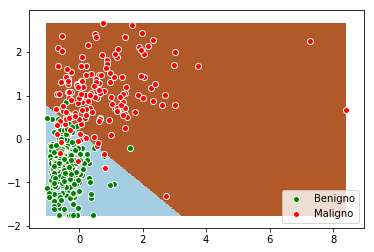

In [18]:
showBounds(lr, X_train, Y_train, labels=["Benigno","Maligno"])

e sul test set

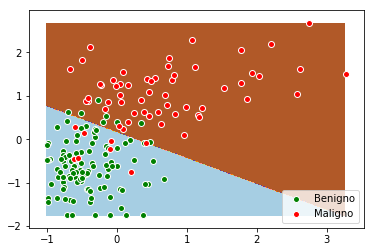

In [19]:
showBounds(lr, X_test, Y_test, labels=["Benigno","Maligno"])

## Regressione logistica con tutte le features
Proviamo a rieseguire la regressione logistica, questa volta utilizzando tutte le proprietà del dataset

In [37]:
X = breast_cancer.drop('diagnosis',axis=1).values
Y = breast_cancer['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Verifichiamo il modello utilizzando sempre <span style="font-family: Monaco">accuracy</span>
 e <span style="font-family: Monaco">log loss</span>

In [38]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9649122807017544
LOG LOSS: 0.11057476772558378


Avendo più informazioni a disposizione, il modello addestrato con tutte le proprietà è notevolmente migliore.

### Regolarizzare la regressione logistica
Hai già utilizzato la regolarizzazione sulla tua regressione logistica senza saperlo, infatti si controlla utilizzando i seguenti parametri:

* **<span style="font-family: Monaco">penalty</span>**: tipo di regolarizzazione da utilizzare, i possibi valori sono 'l1' e 'l2', il valore di default è 'l2'
* **<span style="font-family: Monaco">C</span>**: è l'inversa del parametro di regolarizzazione lambda (o alpha), un valore maggiore ridurrà l'intensità della regolarizzazione, il valore di default è 1.0.

Dato i valori di default, non specificando questi parametri la regressione logistica utilizzerà la regolarizzazione l2 con un lambda di 1.0.

In [ ]:
#lr = LogisticRegression(penalty='l2', C=0.001) # utilizziamo la regolarizzazione l2 in maniera intensa
#lr = LogisticRegression(penalty='l1', C=10.) # utilizziamo la regolarizzazione l1 in maniera debole
lr.fit(X_train, Y_train)